In [38]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.api as sm

import scipy.stats as stats

# Great content about what to be careful about in linear regression modeling
# Update scikit-learn with:
# pip install -U scikit-learn

### Exercise 1:

In [4]:
# 1) Make a scatter plot of the data. Based on the scatter plot alone, is a linear model appropriate for the data?
...

# 1.1) Build the linear model y_hat = b0 + b1 * x
...

# 1.2)  Make the residual plot for the data. Based on the value of r^2 and the residual plot, do you think a linear
#       model is appropriate for the data?
...


,height,weight
0,187.6,109.7
1,174.7,73.6
2,188.2,96.5
3,182.2,99.8
4,177.5,93.6


Ellipsis

Data :



,height,weight
0,187.6,109.7
1,174.7,73.6
2,188.2,96.5
3,182.2,99.8
4,177.5,93.6



Scatterplot of the data :



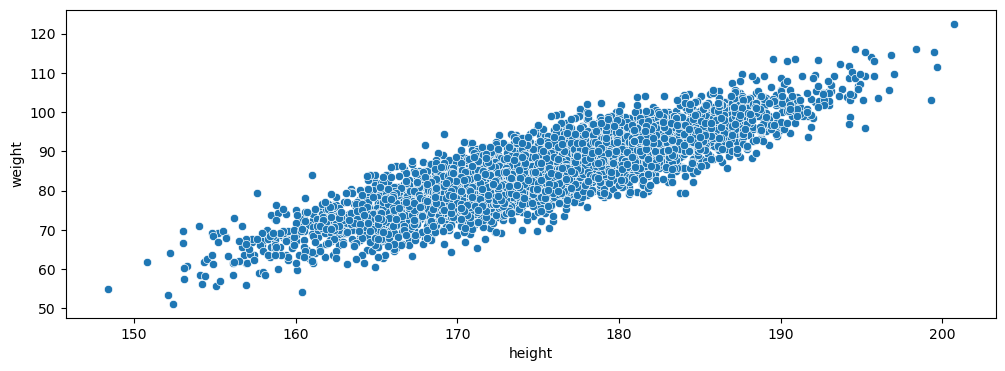

From the scatterplot of the data, we can obviously presume a high linear correlation between height and weight.

Linear regression model : weight = -100.85099565155917 + 1.059029106118337 * height


Scatterplot of the data and the linear regression model :



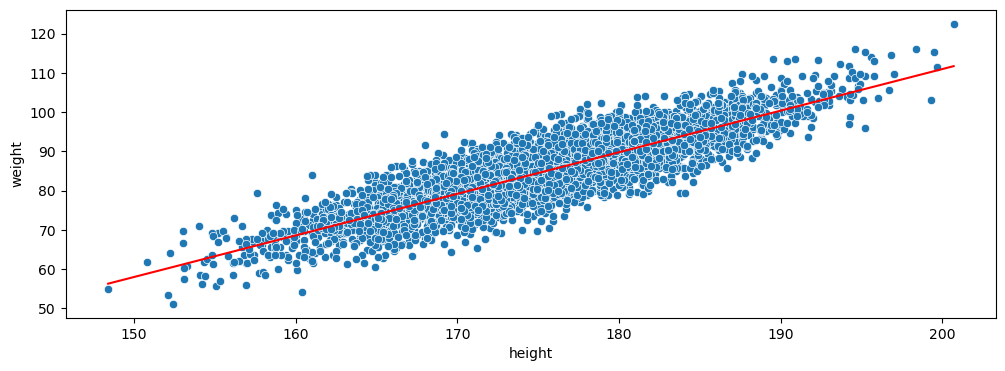


Residuals vs predictions plot and histogram of residuals :



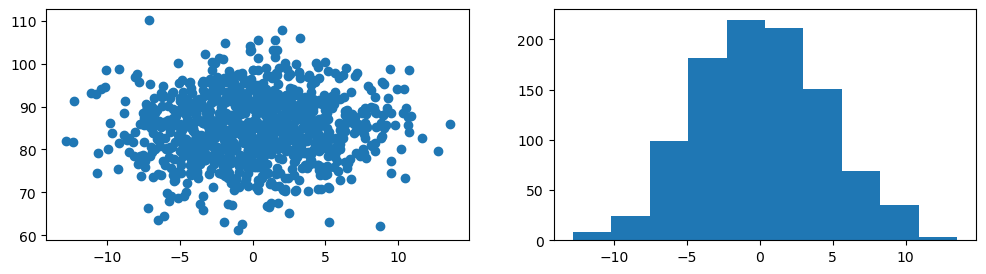

According from the residuals plot, we can say that the linear regression model is a good fit (valid) for this scenario.


Statsmodel and tests:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                 1.458e+04
Date:                Sat, 07 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:40:39   Log-Likelihood:                -14652.
No. Observations:                5000   AIC:                         2.931e+04
Df Residuals:                    4998   BIC:                         2.932e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.02

In [53]:
# Load and the display the data:
print(f"Data :\n")
df = pd.read_csv('heights_and_weights.csv')
display(df.head())

# target variable (y) := weight
# input variable (x) := height
# Linear Regression model := weight = b0 + b1 * height

# Get the data:
X = np.array(df['height']).reshape(-1, 1)
y = np.array(df['weight'])

# Visualize the data:
print(f"\nScatterplot of the data :\n")
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df, x='height', y='weight')
plt.show()

print(f"From the scatterplot of the data, we can obviously presume a high linear correlation between height and weight.\n")

# Split the data into train-test: 80-20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Build the model:
model = LinearRegression().fit(X_train, y_train)

b0, b1 = model.intercept_, model.coef_[0]

print(f"Linear regression model : weight = {b0} + {b1} * height\n")

# Visualize the data and the model:
print(f"\nScatterplot of the data and the linear regression model :\n")
plt.figure(figsize=(12, 4))

sns.scatterplot(data=df, x='height', y='weight')

xs = np.linspace(min(X_train), max(X_train), 1000)
ys = [b0 + b1 * x for x in xs]

plt.plot(xs, ys, color='red')

plt.show()

# Find the residuals:
predictions = model.predict(X_test)
residuals = y_test - predictions

# print(f"Residuals = {residuals}\n")
print(f"\nResiduals vs predictions plot and histogram of residuals :\n")
fig, ax = plt.subplots(1, 2)

fig.set_figwidth(12)
fig.set_figheight(3)

ax[0].scatter(residuals, predictions)
ax[1].hist(residuals)

plt.show()

print(f"According from the residuals plot, we can say that the linear regression model is a good fit (valid) for this scenario.\n")

print(f"\nStatsmodel and tests:\n")
# Fist we must add ones to the original dataset
X_sm = sm.add_constant(X)

# Build the model
model = sm.OLS(y, X_sm)
results = model.fit()

print(results.summary())

---

Data :



,height,weight
0,187.6,109.7
1,174.7,73.6
2,188.2,96.5
3,182.2,99.8
4,177.5,93.6



Scatterplot of the data :



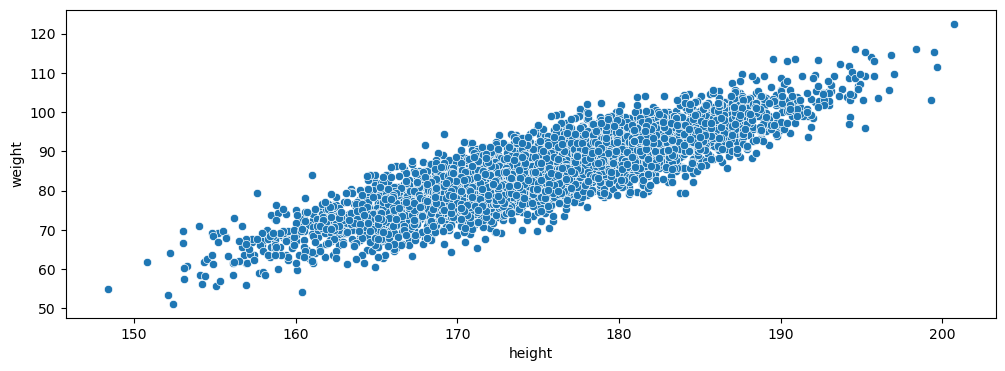

From the scatterplot of the data, we can obviously presume a high linear correlation between height and weight.

Linear regression model : weight = 0.0 + 0.4848041234061005 * height


Scatterplot of the data and the linear regression model :



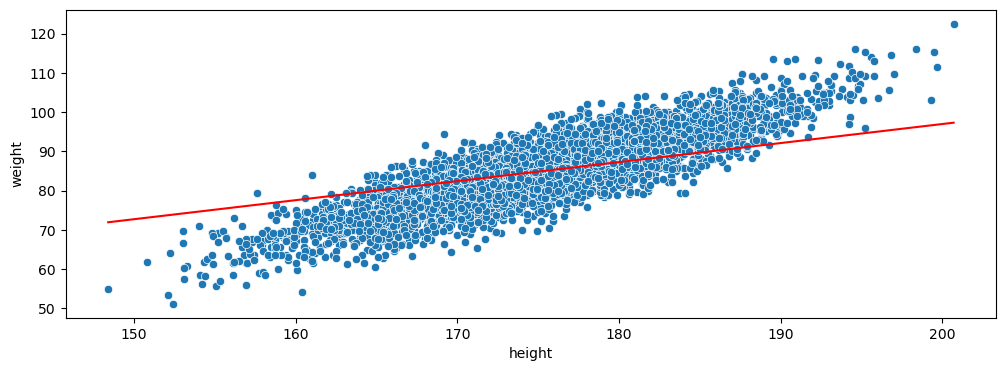


Residuals vs predictions plot and histogram of residuals :



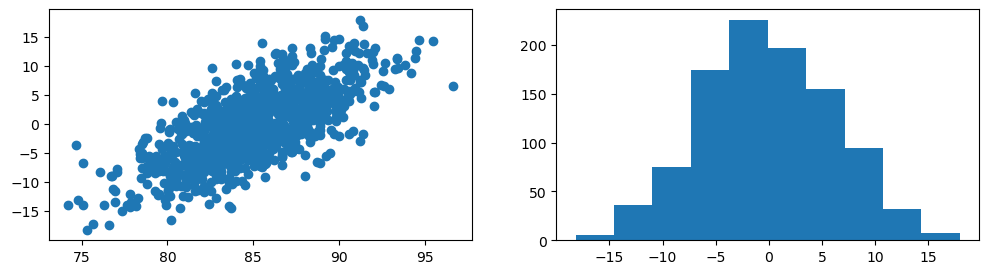

According from the residuals plot, we can see a sort of a line patter (positive autocorrelation). Thus, the model is not a good fit.


Statsmodel and tests:

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          7.531e+05
Date:                Sat, 07 Sep 2024   Prob (F-statistic):                        0.00
Time:                        12:26:33   Log-Likelihood:                         -12973.
No. Observations:                4000   AIC:                                  2.595e+04
Df Residuals:                    3999   BIC:                                  2.596e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust             

In [40]:
# Load and the display the data:
print(f"Data :\n")
df = pd.read_csv('heights_and_weights.csv')
display(df.head())

# target variable (y) := weight
# input variable (x) := height
# Linear Regression model := weight = b1 * height

# Get the data:
X = np.array(df['height']).reshape(-1, 1)
y = np.array(df['weight'])

# Visualize the data:
print(f"\nScatterplot of the data :\n")
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df, x='height', y='weight')
plt.show()

print(f"From the scatterplot of the data, we can obviously presume a high linear correlation between height and weight.\n")

# Split the data into train-test: 80-20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Build the model:
model = LinearRegression(fit_intercept=False).fit(X_train, y_train)

b0, b1 = model.intercept_, model.coef_[0]

print(f"Linear regression model : weight = {b0} + {b1} * height\n")

# Visualize the data and the model:
print(f"\nScatterplot of the data and the linear regression model :\n")
plt.figure(figsize=(12, 4))

sns.scatterplot(data=df, x='height', y='weight')

xs = np.linspace(min(X_train), max(X_train), 1000)
ys = [b1 * x for x in xs]

plt.plot(xs, ys, color='red')

plt.show()

# Find the residuals:
predictions = model.predict(X_test)
residuals = y_test - predictions

# print(f"Residuals = {residuals}\n")
print(f"\nResiduals vs predictions plot and histogram of residuals :\n")
fig, ax = plt.subplots(1, 2)

fig.set_figwidth(12)
fig.set_figheight(3)

ax[0].scatter(predictions, residuals)
ax[1].hist(residuals)

plt.show()

print(f"According from the residuals plot, we can see a sort of a line patter (positive autocorrelation). Thus, the model is not a good fit.\n")

print(f"\nStatsmodel and tests:\n")
# Fist we must add ones to the original dataset
X_sm = sm.add_constant(X_train)

# Build the model
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

---
---

### Exercise 2:

,fund_name,fund_type,net_asset_value,expense_ratio,morningstar_rank,five_year_avg_return
0,Amer Cent Inc & Growth Inv,DE,28.88,0.67,2-Star,12.39
1,American Century Intl. Disc,IE,14.37,1.41,3-Star,30.53
2,American Century Tax-Free Bond,FI,10.73,0.49,4-Star,3.34
3,American Century Ultra,DE,24.94,0.99,3-Star,10.88
4,Ariel,DE,46.39,1.03,2-Star,11.32



five_year_avg_return = 0.2136118190824714 + 0.1532038318946585 * net_asset_value + 11.669142582091979 * expense_ratio



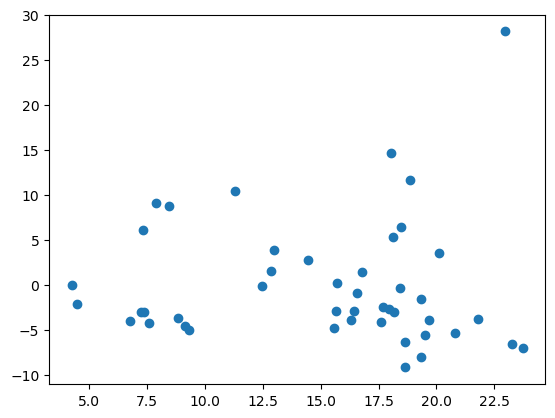

r^2 = 0.37310517954477973

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     12.50
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           5.51e-05
Time:                        12:40:57   Log-Likelihood:                -150.74
No. Observations:                  45   AIC:                             307.5
Df Residuals:                      42   BIC:                             312.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2136    

In [54]:
df = pd.read_csv('mutual_funds.csv')

display(df.head())

# y := five_year_avg_return, x1 := net_asset_value, x2 := expense_ratio
X = np.array(df[['net_asset_value', 'expense_ratio']])
y = np.array(df['five_year_avg_return'])

model = LinearRegression().fit(X, y)

w0, w1, w2 = model.intercept_, model.coef_[0], model.coef_[1]

print(f"\nfive_year_avg_return = {w0} + {w1} * net_asset_value + {w2} * expense_ratio\n")

predictions = model.predict(X)

residuals = y - predictions

plt.scatter(predictions, residuals)

plt.show()

print(f"r^2 = {model.score(X, y)}\n")

# Fist we must add ones to the original dataset
X_sm = sm.add_constant(X)

# Build the model
model = sm.OLS(y, X_sm)
results = model.fit()

print(results.summary())

In [55]:
# The goal of this exercise is to build models to predict the 5-year average return for a domestic equity fund
# with a Net Asset Value of $35.53 and an expense ratio of 1.05% and a 3-Star Morningstar Rank. 

f = lambda x1, x2: w0 + w1 * x1 + w2 * x2

f(35.53, 1.05)

17.909543677496266

,fund_name,fund_type,net_asset_value,expense_ratio,morningstar_rank,five_year_avg_return
0,Amer Cent Inc & Growth Inv,DE,28.88,0.67,2-Star,12.39
1,American Century Intl. Disc,IE,14.37,1.41,3-Star,30.53
2,American Century Tax-Free Bond,FI,10.73,0.49,4-Star,3.34
3,American Century Ultra,DE,24.94,0.99,3-Star,10.88
4,Ariel,DE,46.39,1.03,2-Star,11.32


,fund_name,fund_type,net_asset_value,expense_ratio,morningstar_rank,five_year_avg_return,fund_type_encoded,morningstar_rank_encoded
0,Amer Cent Inc & Growth Inv,DE,28.88,0.67,2-Star,12.39,0.0,0.0
1,American Century Intl. Disc,IE,14.37,1.41,3-Star,30.53,2.0,1.0
2,American Century Tax-Free Bond,FI,10.73,0.49,4-Star,3.34,1.0,2.0
3,American Century Ultra,DE,24.94,0.99,3-Star,10.88,0.0,1.0
4,Ariel,DE,46.39,1.03,2-Star,11.32,0.0,0.0



five_year_avg_return = -4.83 + 0.17 * net_asset_value + 12.44 * expense_ratio + 4.18 * fund_type + 0.85 * morningstar_rank



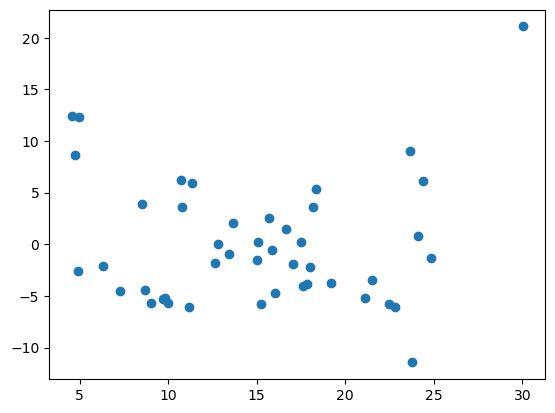

r^2 = 0.5121278918325248

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     10.50
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           6.56e-06
Time:                        12:54:15   Log-Likelihood:                -145.10
No. Observations:                  45   AIC:                             300.2
Df Residuals:                      40   BIC:                             309.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8288     

In [68]:
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('mutual_funds.csv')

display(df.head())

encoder = OrdinalEncoder()
df['fund_type_encoded'] = encoder.fit_transform(np.array(df['fund_type']).reshape(-1, 1))
df['morningstar_rank_encoded'] = encoder.fit_transform(np.array(df['morningstar_rank']).reshape(-1, 1))

display(df.head())

# y := five_year_avg_return, x1 := net_asset_value, x2 := expense_ratio
X = np.array(df[['net_asset_value', 'expense_ratio', 'fund_type_encoded', 'morningstar_rank_encoded']])
y = np.array(df['five_year_avg_return'])

model = LinearRegression().fit(X, y)

w0, w1, w2, w3, w4 = model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]

print(f"\nfive_year_avg_return = {round(w0, 2)} + {round(w1, 2)} * net_asset_value + {round(w2, 2)} * expense_ratio + {round(w3, 2)} * fund_type + {round(w4, 2)} * morningstar_rank\n")

predictions = model.predict(X)

residuals = y - predictions

plt.scatter(predictions, residuals)

plt.show()

print(f"r^2 = {model.score(X, y)}\n")

# # Fist we must add ones to the original dataset
X_sm = sm.add_constant(X)

# Build the model
model = sm.OLS(y, X_sm)
results = model.fit()

print(results.summary())

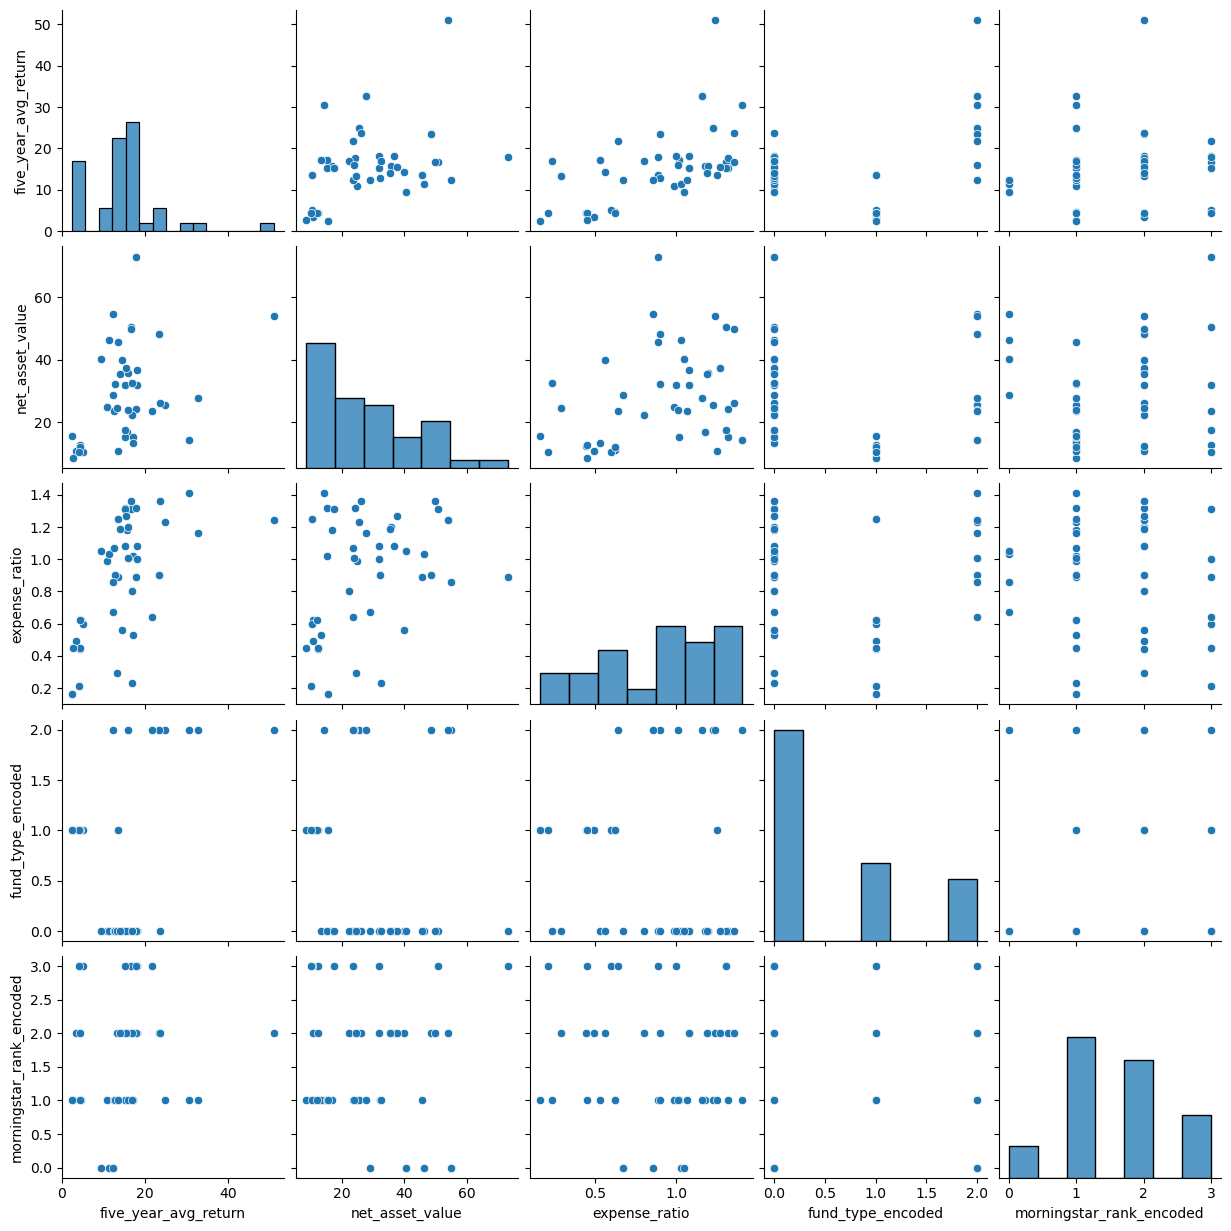

In [69]:
sns.pairplot(df[['five_year_avg_return', 'net_asset_value', 'expense_ratio', 'fund_type_encoded', 'morningstar_rank_encoded']])